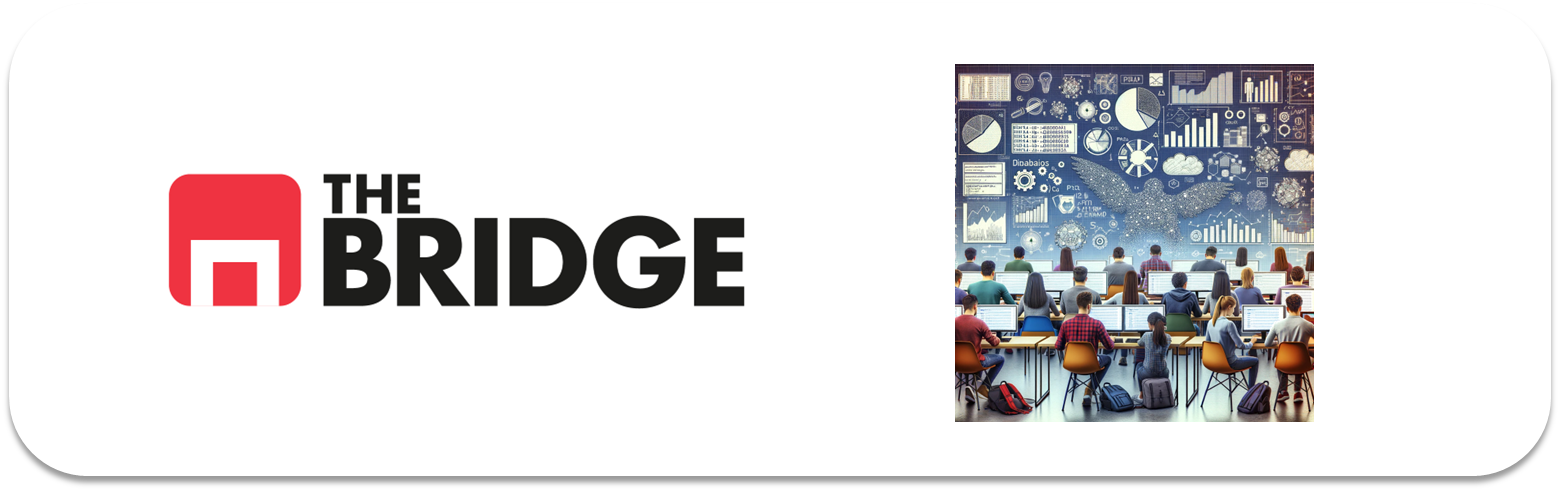

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.options.mode.copy_on_write = True

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic. 

In [2]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [4]:
## En base a la primera exploración fijamos la variable objetivo o target
## y seleccionamos las primeras variables a excluir (variables ya convertidas o repetidas) 
target = "survived"
excluidas = ["embark_town", "alive", "class", "adult_male"]

3.Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [5]:
## En la primera exploración vemos que la columna "deck" tiene un elevado porcentaje de valores faltantes
## Antes de decidir qué hacer con la columna, podemos sustituir esos faltantes por una nueva categoria desconocida o unknown "UNK"
df.deck.value_counts(dropna=False, normalize=True)

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [6]:
df_deck = df.copy()
df_deck["deck"] = df_deck.deck.fillna("UNK")
df_deck.deck.value_counts(normalize=True)

deck
UNK    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [8]:
# excluidas = ["alive","embark_town","class"]
features_base = [col for col in df_deck.columns if col not in excluidas]
features_base.remove("deck")

features_base_deck = [col for col in df_deck.columns if col not in excluidas]
features_base_deck

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'who',
 'deck',
 'alone']

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

Quiero estratificar respecto a la ciudad de embarque pero tiene nulos y train_test_split con stratify no funciona si tenemos nulos.
Dos opciones:

Me cargo las filas.
Son dos, me olvido de los consejos dados en clase e imputo por la moda

In [9]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [10]:
df_deck["embarked"].value_counts(dropna=False, normalize=True)

embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [11]:
df_deck = df_deck.dropna(subset="embarked") # Si quiero cargarme las filas

# df_deck.loc[df_deck["embarked"].isna(), "embarked"] = df_deck["embarked"].mode()[0] # Si quiero imputar por la moda

In [12]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [13]:
df_deck["embarked"].value_counts(dropna=False, normalize=True)

embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

Ahora que no hay nulos, podemos estratificar respecto a la ciudad de embarque

In [14]:
train_set, test_set = train_test_split(df_deck, test_size= 0.2, stratify= df_deck["embarked"], random_state= 42)

In [15]:
# Comprobamos estratificado en conjunto entrenamiento
train_set.embarked.value_counts(normalize= True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [16]:
# Comprobamos estratificado en conjunto test
test_set.embarked.value_counts(normalize= True)

embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64

In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          573 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


En este caso, solo nos quedan nulos en la columna "age". Al tratarse de la variable de edad, y dado que tenemos pasajeros de diversas edades, si decidimos imputar por la mediana de la variable podrían darse casos en los que imputemos edades de 28 años a niños, lo que evidentemente no tiene sentido.

Un enfoque más fino es imputar sus respectivas medias o medianas en función del genero, es decir, imputar a hombres, mujeres y niñ@s sus respectivas medias medias o medianas.

En nuestro ejemplo, elegimos la mediana no solo por ser más resistente a valores atípicos sino porque nos permite imputar variables discretas.

In [18]:
# Elegimos la mediana no tanto por la distribución de edades sino para imputar variables discretas.

es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

median_man = train_set[es_hombre]["age"].median()
median_woman = train_set[es_mujer]["age"].median()
median_child = train_set[es_child]["age"].median()

es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

#Imputamos en train
train_set.loc[es_hombre & es_nulo, "age"] = median_man
train_set.loc[es_mujer & es_nulo, "age"] = median_woman
train_set.loc[es_child & es_nulo, "age"] = median_child

#Imputamos en test
test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = median_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = median_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = median_child

In [19]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 223 to 142
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     178 non-null    int64  
 1   pclass       178 non-null    int64  
 2   sex          178 non-null    object 
 3   age          178 non-null    float64
 4   sibsp        178 non-null    int64  
 5   parch        178 non-null    int64  
 6   fare         178 non-null    float64
 7   embarked     178 non-null    object 
 8   class        178 non-null    object 
 9   who          178 non-null    object 
 10  adult_male   178 non-null    bool   
 11  deck         178 non-null    object 
 12  embark_town  178 non-null    object 
 13  alive        178 non-null    object 
 14  alone        178 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 19.8+ KB


In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          711 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


Ya no tenemos nulos, seguimos con mini-eda

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [21]:
# Lo primero en las clasificaciones -> miramos la distribución del target
train_set[target].value_counts(normalize = True)

survived
0    0.618847
1    0.381153
Name: proportion, dtype: float64

Ligeramente desequilibrado, que no loco, habría que estudiar como equilibrarlo en caso de que los resultados no sean los adecuados para la clase que se quiera predecir con mayor prioridad.

Usaremos el pairplot para verlo de mejor gracias al hue, pero en dos tandas y las categoricas ya pasadas a números (pclass, alone, adult_male) las veremos con su tabla de contigencia y el análisis visual

In [22]:
train_set[features_base_deck].info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  711 non-null    int64  
 1   pclass    711 non-null    int64  
 2   sex       711 non-null    object 
 3   age       711 non-null    float64
 4   sibsp     711 non-null    int64  
 5   parch     711 non-null    int64  
 6   fare      711 non-null    float64
 7   embarked  711 non-null    object 
 8   who       711 non-null    object 
 9   deck      711 non-null    object 
 10  alone     711 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 61.8+ KB


In [23]:
# Análisis visual numéricas
features_num = ["age","sibsp","parch","fare"]

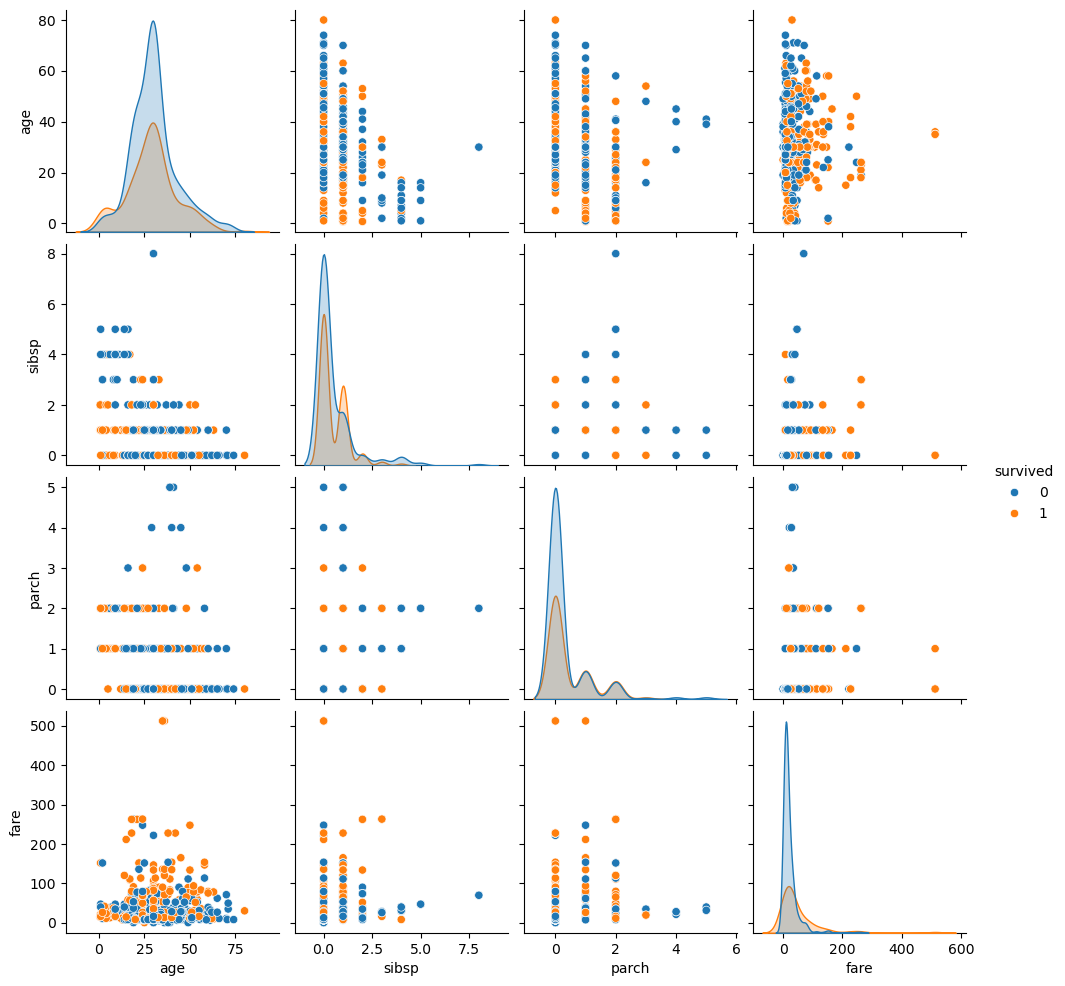

In [24]:
sns.pairplot(train_set[features_num + [target]], hue = target)

In [25]:
features_num = ["fare","age","sibsp"] # Descartamos "parch" porque no discrima entre clases de nuestro objetivo

In [26]:
# Análisis visual categóricas
features_cat = ["pclass","sex","embarked","alone","who","deck"]

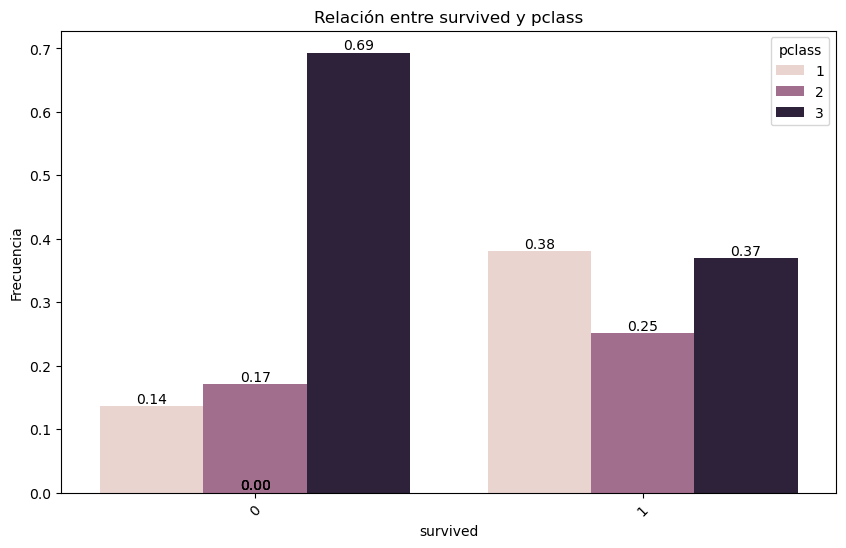

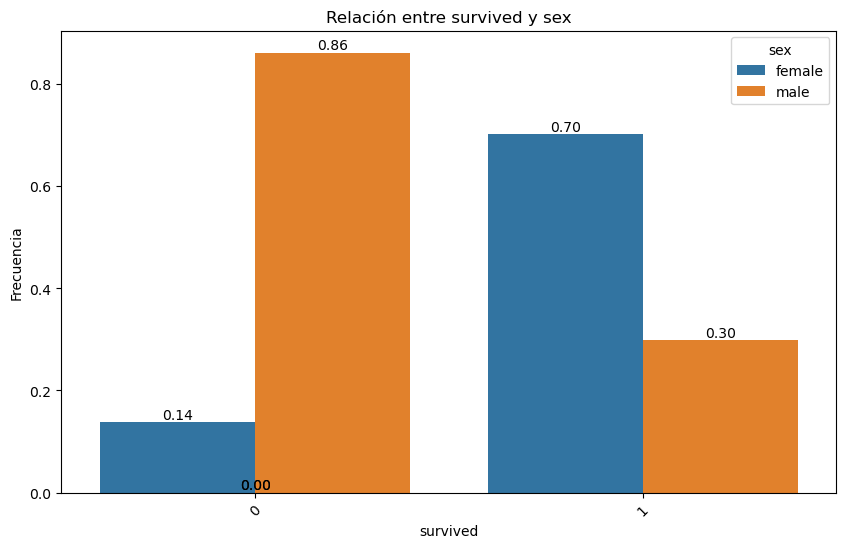

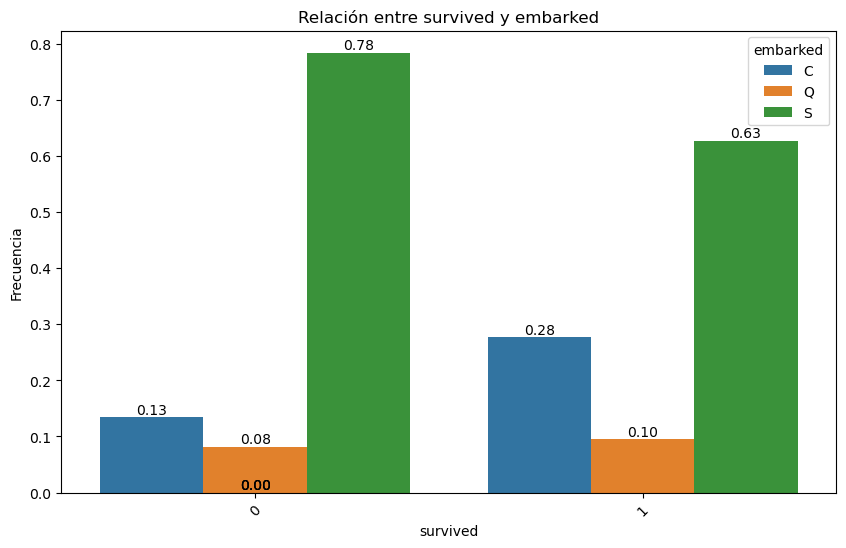

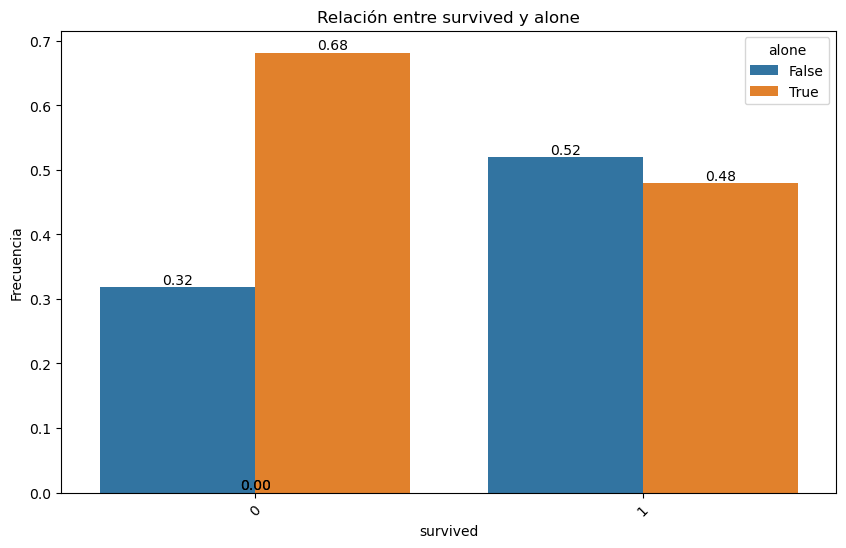

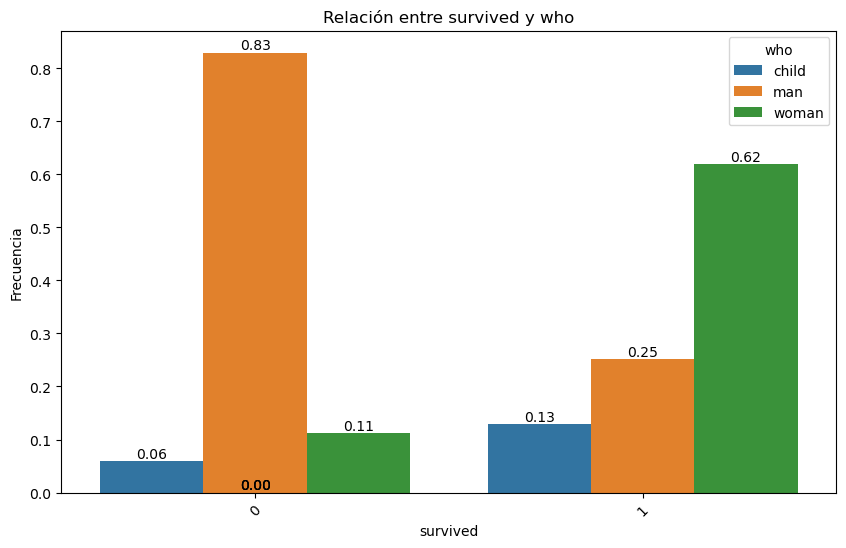

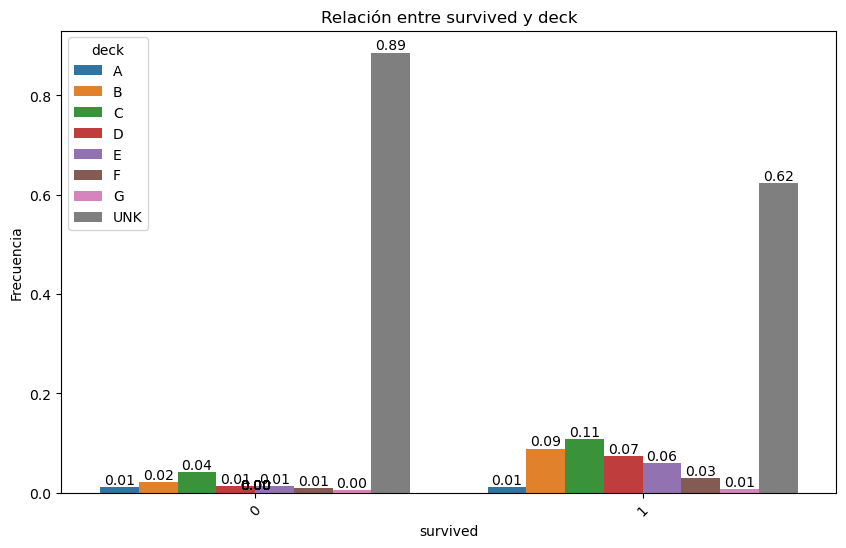

In [27]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

In [28]:
# Para el caso de "deck" podemos transformarla en una nueva variable binaria
# Conozco o no conozco el deck -> deck_informed true or false

train_set["deck_informed"] = train_set.deck != "UNK"
test_set["deck_informed"] = test_set.deck != "UNK"

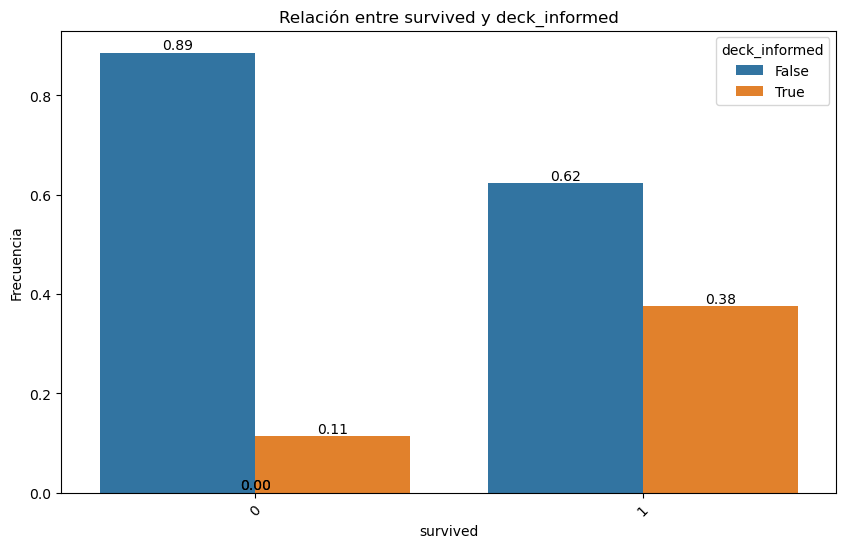

In [29]:
bt.plot_categorical_relationship_fin(train_set, target,"deck_informed", show_values= True, relative_freq= True)

Me quedo con "pclass", "who", "embarked", "alone", "deck_informed", y por si acaso "fare", "age" y "sibsp"

In [30]:
features_cat.remove("deck")  #quito deck
features_cat.append("deck_informed") #pongo deck_informed

In [31]:
features_num

['fare', 'age', 'sibsp']

In [32]:
features_cat

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

8. Trata las variables para que funcionen lo mejor posible en el modelo.

**Procesando categoricas**

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
categories = [["female","male"], ["S","C","Q"], ["child","woman","man"]] # Podemos darle este orden, otro o ninguno

encoder = OrdinalEncoder(categories= categories)

train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

In [35]:
train_set[["sex","embarked","who"]]

,sex,embarked,who
46,1.0,2.0,2.0
230,0.0,0.0,1.0
657,0.0,2.0,1.0
888,0.0,0.0,1.0
809,0.0,0.0,1.0
...,...,...,...
222,1.0,0.0,2.0
167,0.0,0.0,1.0
123,0.0,0.0,1.0
150,1.0,0.0,2.0


In [36]:
## Podríamos haberlas procesado con One-hot encoding con pd.get_dummies
## Y también podríamos echar un ojo al OneHotEncoder de Scikit-learn 
# encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False) -> contener el problema de dimensionalidad para datos de test 

# train_set = pd.get_dummies(train_set, columns=["embarked","who","sex"], dtype = int)
# test_set  = pd.get_dummies(test_set, columns =["embarked","who","sex"], dtype = int)

**Procesando numéricas**

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>, <Axes: >]], dtype=object)

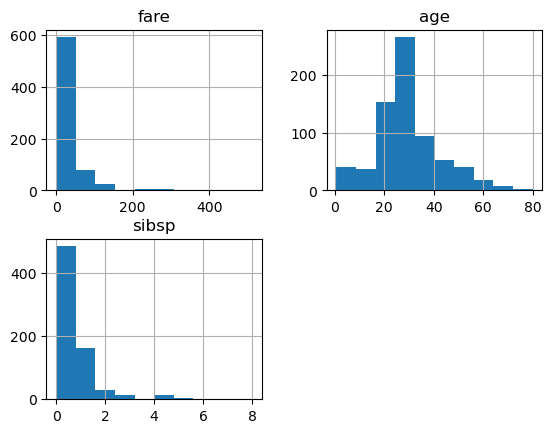

In [37]:
# Comprobamos distribución numéricas
train_set[features_num].hist()

<Axes: >

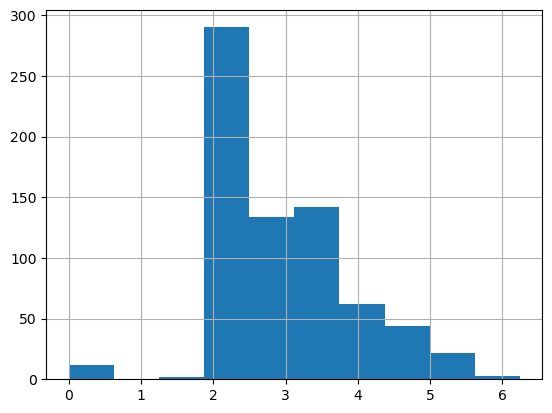

In [38]:
# Aplicamos logaritmo a fare, se rompe porque hay valores 0 
(train_set["fare"]+1).apply(np.log).hist()

Deberíamos tratar el fare, pero como no podemos hacer el logaritmo, otras posibles opciones:

Hacer log(x+1)
Hacer sqrt(x) o cbrt(x) (raiz cúbica)

<Axes: >

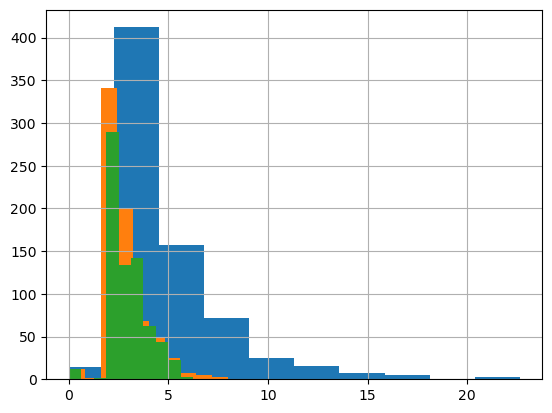

In [39]:
np.sqrt(train_set["fare"]).hist() # Azul
np.cbrt(train_set["fare"]).hist() # Naranja
np.log1p(train_set["fare"]).hist() # Verde

<Axes: >

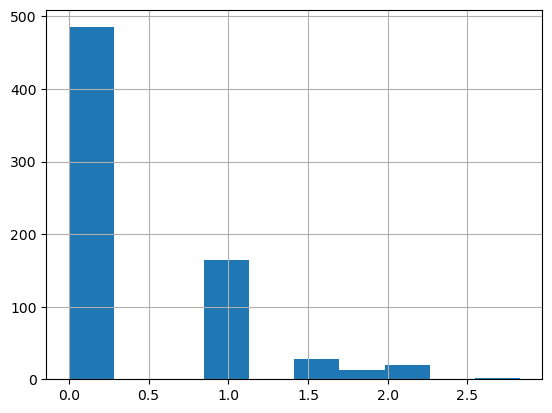

In [40]:
train_set["sibsp"].apply(np.sqrt).hist()

<Axes: >

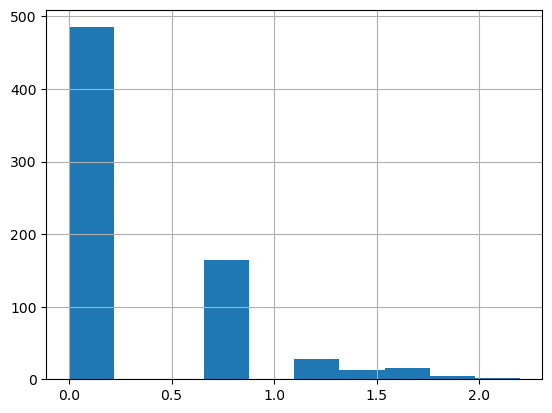

In [41]:
np.log(train_set["sibsp"]+1).hist()

In [42]:
# Aplicaremos raíz cuadrada a train y test
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])

# train_set["sibsp"] = np.sqrt(train_set["sibsp"])
# test_set["sibsp"] = np.sqrt(test_set["sibsp"])

In [43]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_informed
46,0,3,1.0,30.0,1,0,3.937004,2.0,Third,2.0,True,UNK,Queenstown,no,False,False
230,1,1,0.0,35.0,1,0,9.136465,0.0,First,1.0,False,C,Southampton,yes,False,True
657,0,3,0.0,32.0,1,1,3.937004,2.0,Third,1.0,False,UNK,Queenstown,no,False,False
888,0,3,0.0,30.0,1,2,4.842520,0.0,Third,1.0,False,UNK,Southampton,no,False,False
809,1,1,0.0,33.0,1,0,7.286975,0.0,First,1.0,False,E,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,3,1.0,51.0,0,0,2.837252,0.0,Third,2.0,True,UNK,Southampton,no,True,False
167,0,3,0.0,45.0,1,4,5.282045,0.0,Third,1.0,False,UNK,Southampton,no,False,False
123,1,2,0.0,32.5,0,0,3.605551,0.0,Second,1.0,False,E,Southampton,yes,True,True
150,0,2,1.0,51.0,0,0,3.539068,0.0,Second,2.0,True,UNK,Southampton,no,True,False


*Escalamos*

In [44]:
scaler = StandardScaler()
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])
train_set[features_num].describe()

,fare,age,sibsp
count,7.110000e+02,7.110000e+02,7.110000e+02
mean,2.748231e-17,9.993569e-17,-3.497749e-17
std,1.000704e+00,1.000704e+00,1.000704e+00
min,-1.616518e+00,-2.232200e+00,-5.091491e-01
25%,-6.670619e-01,-5.958321e-01,-5.091491e-01
50%,-3.522452e-01,1.790165e-02,-5.091491e-01
75%,2.429585e-01,4.014852e-01,5.105833e-01
max,6.031542e+00,3.853737e+00,7.648711e+00


In [45]:
test_set[features_num].describe()

,fare,age,sibsp
count,178.000000,178.000000,178.000000
mean,0.097663,-0.020422,0.126751
std,0.967723,0.974226,1.524850
min,-1.616518,-2.251379,-0.509149
25%,-0.657836,-0.442399,-0.509149
50%,-0.199008,0.017902,-0.509149
75%,0.428358,0.401485,0.510583
max,3.863155,2.702987,7.648711


Una vez preparadas nuestras variables, hacemos unos cuantos sets de variables a ver cuál se comporta mejor con el modelo

In [46]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_informed
46,0,3,1.0,0.017902,0.510583,0,-0.286239,2.0,Third,2.0,True,UNK,Queenstown,no,False,False
230,1,1,0.0,0.401485,0.510583,0,1.470612,0.0,First,1.0,False,C,Southampton,yes,False,True
657,0,3,0.0,0.171335,0.510583,1,-0.286239,2.0,Third,1.0,False,UNK,Queenstown,no,False,False
888,0,3,0.0,0.017902,0.510583,2,0.019727,0.0,Third,1.0,False,UNK,Southampton,no,False,False
809,1,1,0.0,0.248052,0.510583,0,0.845686,0.0,First,1.0,False,E,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,3,1.0,1.628953,-0.509149,0,-0.657836,0.0,Third,2.0,True,UNK,Southampton,no,True,False
167,0,3,0.0,1.168652,0.510583,4,0.168238,0.0,Third,1.0,False,UNK,Southampton,no,False,False
123,1,2,0.0,0.209693,-0.509149,0,-0.398234,0.0,Second,1.0,False,E,Southampton,yes,True,True
150,0,2,1.0,1.628953,-0.509149,0,-0.420698,0.0,Second,2.0,True,UNK,Southampton,no,True,False


In [47]:
features_set_cat_1 = ["pclass","who"] # set de categóricas 1
features_set_cat_2 = features_cat # set de categóricas 2

features_set_cat_1

['pclass', 'who']

In [48]:
features_set_cat_2

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [49]:
features_num

['fare', 'age', 'sibsp']

**Modelado**

9. Construye un modelo de regresión logística.

In [51]:
X_train = train_set[features_set_cat_1]
y_train = train_set[target]

X_test = test_set[features_set_cat_1]
y_test = test_set[target]

In [52]:
log_class_1 = LogisticRegression(max_iter = 10000) # Hiperparámetros

log_class_1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [53]:
# Muy importante, entender las métricas en función del tipo de problema:
# Métricas de regresión (MAE, MSE, RMSE, MAPE, R^2)
# Métricas de clasificación (accuracy, precision, recall, f1-score, auroc)

In [55]:
def metrics_titanic(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       440
           1       0.84      0.58      0.68       271

    accuracy                           0.80       711
   macro avg       0.81      0.75      0.77       711
weighted avg       0.80      0.80      0.79       711



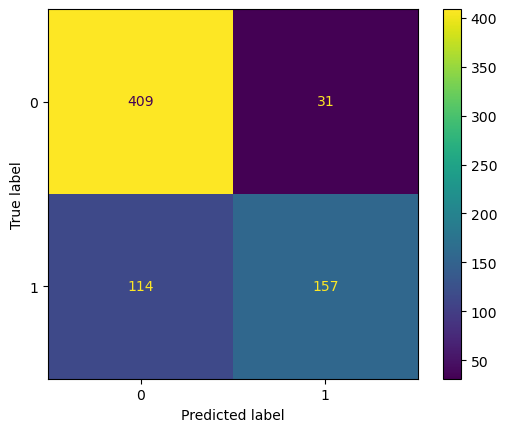

In [56]:
### train metrics
metrics_titanic(log_class_1, X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       109
           1       0.78      0.57      0.66        69

    accuracy                           0.77       178
   macro avg       0.77      0.73      0.74       178
weighted avg       0.77      0.77      0.76       178



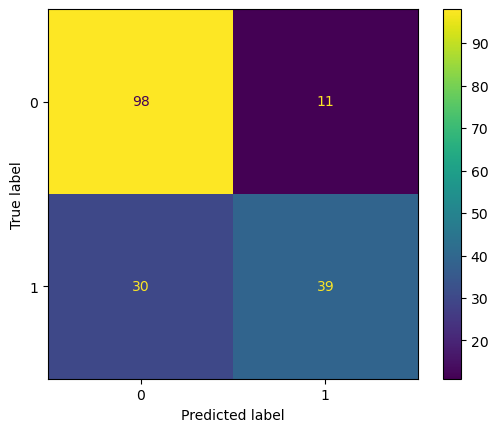

In [57]:
### test_metrics
metrics_titanic(log_class_1, X_test, y_test)

AUROC: 0.83


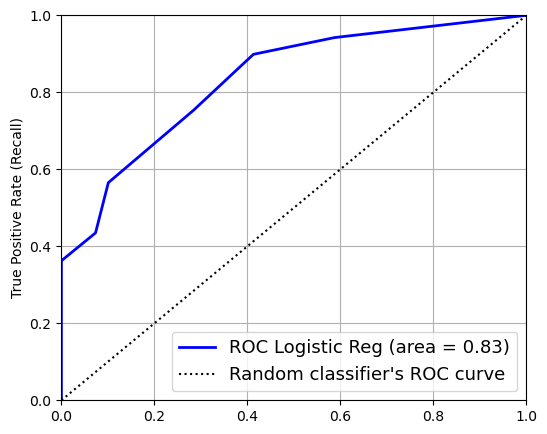

In [58]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

**Otro juego de features**

In [59]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_informed
46,0,3,1.0,0.017902,0.510583,0,-0.286239,2.0,Third,2.0,True,UNK,Queenstown,no,False,False
230,1,1,0.0,0.401485,0.510583,0,1.470612,0.0,First,1.0,False,C,Southampton,yes,False,True
657,0,3,0.0,0.171335,0.510583,1,-0.286239,2.0,Third,1.0,False,UNK,Queenstown,no,False,False
888,0,3,0.0,0.017902,0.510583,2,0.019727,0.0,Third,1.0,False,UNK,Southampton,no,False,False
809,1,1,0.0,0.248052,0.510583,0,0.845686,0.0,First,1.0,False,E,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,3,1.0,1.628953,-0.509149,0,-0.657836,0.0,Third,2.0,True,UNK,Southampton,no,True,False
167,0,3,0.0,1.168652,0.510583,4,0.168238,0.0,Third,1.0,False,UNK,Southampton,no,False,False
123,1,2,0.0,0.209693,-0.509149,0,-0.398234,0.0,Second,1.0,False,E,Southampton,yes,True,True
150,0,2,1.0,1.628953,-0.509149,0,-0.420698,0.0,Second,2.0,True,UNK,Southampton,no,True,False


In [60]:
train_set.columns.to_list() == test_set.columns.to_list()

True

In [61]:
X_train = train_set[features_set_cat_2]
y_train = train_set[target]

X_test = test_set[features_set_cat_2]
y_test = test_set[target]

In [62]:
log_class_2 = LogisticRegression(max_iter = 10000)

log_class_2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Si hemos hecho onehot encondig, hay que completar posibles columnas faltantes cuando se ha hecho con get_dummies de pandas y en test no había alguno de los valores:

In [63]:
# for col in X_train.columns:
#     if col not in test_set:
#         test_set[col] = 0

# X_train = train_set[features_set_cat_2]
# y_train = train_set[target]
# X_test = test_set[features_set_cat_2]
# y_test = test_set[target]

# log_class_2 = LogisticRegression(max_iter = 10000)
# log_class_2.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       440
           1       0.80      0.71      0.75       271

    accuracy                           0.82       711
   macro avg       0.82      0.80      0.81       711
weighted avg       0.82      0.82      0.82       711



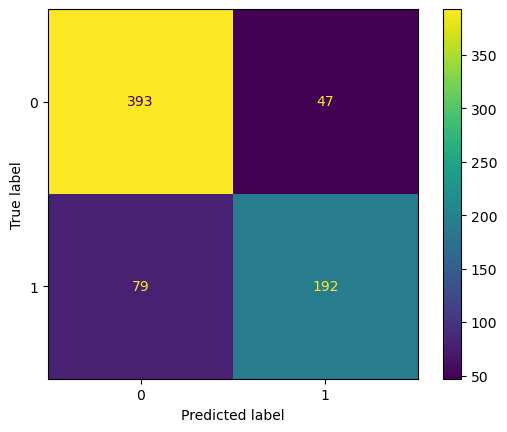

In [64]:
metrics_titanic(log_class_2, X_train,y_train)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.67      0.71        69

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



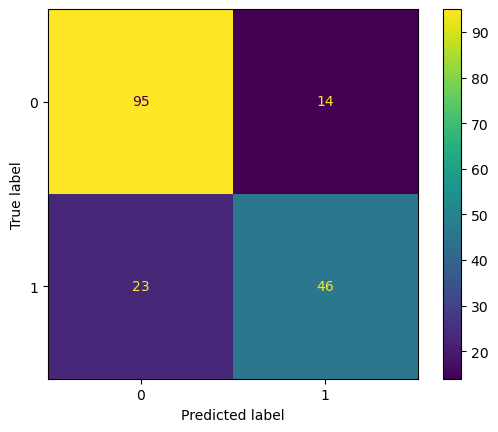

In [65]:
### test_metrics
metrics_titanic(log_class_2, X_test, y_test)

AUROC: 0.84


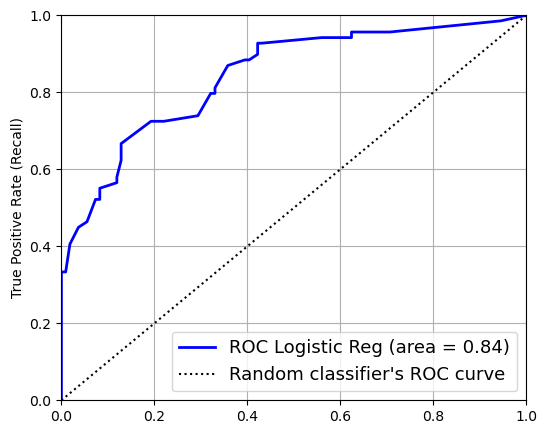

In [66]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [67]:
### Con numéricas

X_train = train_set[features_set_cat_2 + features_num]
y_train = train_set[target]
X_test = test_set[features_set_cat_2 + features_num]
y_test = test_set[target]

log_class_3 = LogisticRegression(max_iter = 10000)

log_class_3.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.84      0.88      0.85       440
           1       0.78      0.72      0.75       271

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.81      0.82      0.81       711



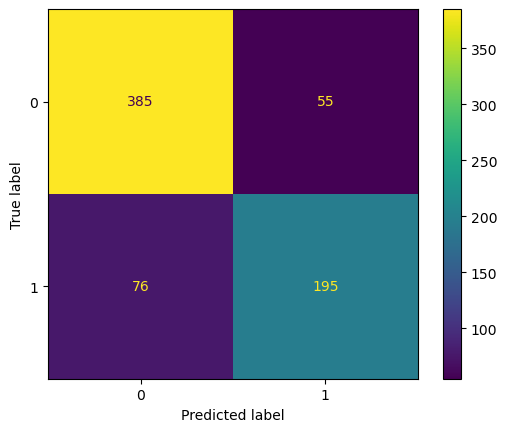

In [68]:
metrics_titanic(log_class_3, X_train, y_train)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.73      0.71      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



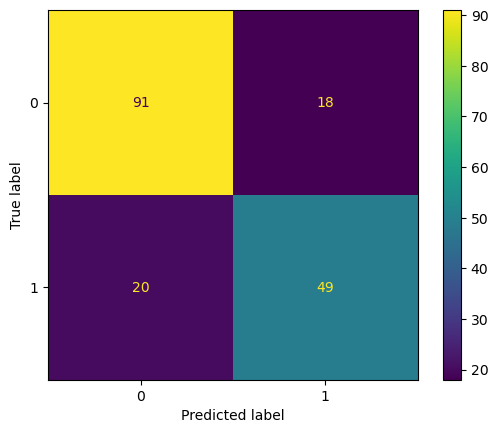

In [69]:
metrics_titanic(log_class_3, X_test, y_test)

AUROC: 0.86


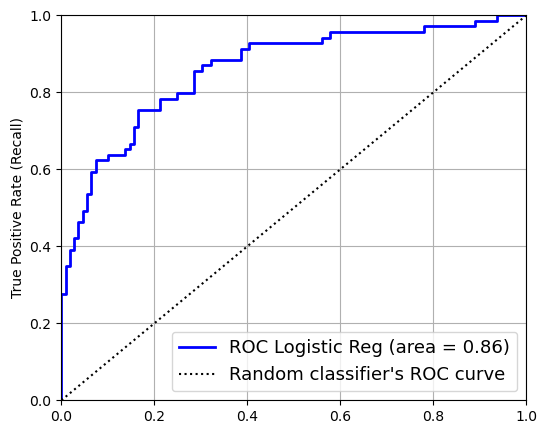

In [70]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, [en segunda clase] viajaba solo y no pagó el billete. Incorrecto: Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado. Usaremos la media de probabilidades

In [71]:
features_set_cat_2 + features_num

['pclass',
 'sex',
 'embarked',
 'alone',
 'who',
 'deck_informed',
 'fare',
 'age',
 'sibsp']

In [72]:
data_base = {
    "pclass": 2,
    "embarked": 0,
    "alone": True,
    "fare": 0,
    "who":2,
    "deck_informed": 0,
    "sibsp": 0,
    "sex": 0
}

probs = []
for age in range(30,41):
    data = data_base.copy()
    data["age"] = age
    X_man = pd.DataFrame([data])
    X_man[features_num] = scaler.transform(X_man[features_num])
    print(X_man)
    prob_dead, prob_surv = log_class_3.predict_proba(X_man[features_set_cat_2 + features_num])[0]
    probs.append(prob_surv)
    
print("Prob media de sobrevivir:", np.mean(probs))

   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.509149    0   

        age  
0  0.017902  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.509149    0   

        age  
0  0.094618  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.509149    0   

        age  
0  0.171335  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.509149    0   

        age  
0  0.248052  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.616518    2              0 -0.509149    0   

        age  
0  0.324769  
   pclass  embarked  alone      fare  who  deck_informed     sibsp  sex  \
0       2         0   True -1.

In [73]:
target = "survived"

In [74]:
new_features = features_set_cat_2 + features_num + [target]
new_target = "pclass"
new_features.remove(new_target)
print(new_features)

['sex', 'embarked', 'alone', 'who', 'deck_informed', 'fare', 'age', 'sibsp', 'survived']


In [75]:
X_train = train_set[new_features]
y_train = train_set[new_target]

X_test = test_set[new_features]
y_test = test_set[new_target]

In [76]:
X_train

,sex,embarked,alone,who,deck_informed,fare,age,sibsp,survived
46,1.0,2.0,False,2.0,False,-0.286239,0.017902,0.510583,0
230,0.0,0.0,False,1.0,True,1.470612,0.401485,0.510583,1
657,0.0,2.0,False,1.0,False,-0.286239,0.171335,0.510583,0
888,0.0,0.0,False,1.0,False,0.019727,0.017902,0.510583,0
809,0.0,0.0,False,1.0,True,0.845686,0.248052,0.510583,1
...,...,...,...,...,...,...,...,...,...
222,1.0,0.0,True,2.0,False,-0.657836,1.628953,-0.509149,0
167,0.0,0.0,False,1.0,False,0.168238,1.168652,0.510583,0
123,0.0,0.0,True,1.0,True,-0.398234,0.209693,-0.509149,1
150,1.0,0.0,True,2.0,False,-0.420698,1.628953,-0.509149,0


In [77]:
log_class = LogisticRegression(max_iter=10000)

log_class.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91       163
           2       0.78      0.43      0.55       143
           3       0.82      0.95      0.88       405

    accuracy                           0.84       711
   macro avg       0.84      0.76      0.78       711
weighted avg       0.83      0.84      0.82       711



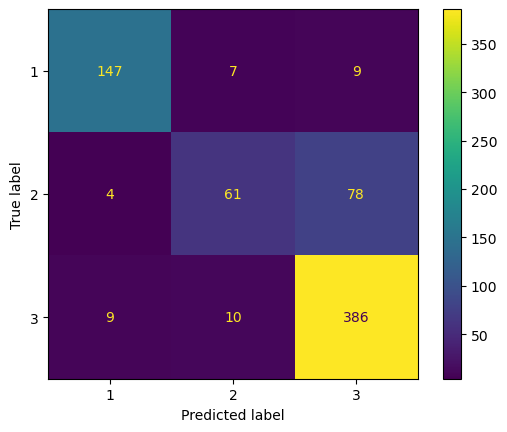

In [78]:
metrics_titanic(log_class,X_train, y_train)

              precision    recall  f1-score   support

           1       0.90      0.92      0.91        51
           2       0.61      0.27      0.37        41
           3       0.74      0.93      0.82        86

    accuracy                           0.78       178
   macro avg       0.75      0.71      0.70       178
weighted avg       0.76      0.78      0.75       178



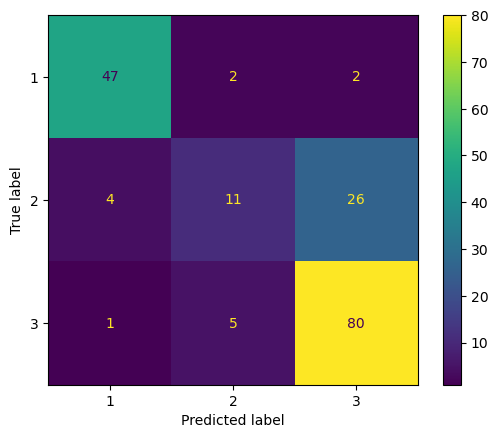

In [79]:
metrics_titanic(log_class,X_test, y_test)